In [1]:
%pip install torch
%pip install transformers

%pip install scikit-learn
%pip install pandas
%pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import argparse
import json

import torch
# from peft import (
#     LoraConfig,
#     get_peft_model,
#     get_peft_model_state_dict,
#     prepare_model_for_kbit_training
# )
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments,
    AutoModel
)
import sklearn
import pandas as pd
from sklearn.cluster import KMeans

from tqdm import tqdm

In [4]:
! ls

google_trends_2.csv  google_trends.csv	sample_data  twitter_trends_2.csv  twitter_trends.csv


## Merge

fixing bug in file

In [43]:
import pandas as pd

file_path = "Trending_Tweets_per_week/2021_September_twitter_trending_data.csv"

try:
    # Прочитать файл
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read()
    
    # Вывести первые несколько строк для оценки
    print(data[:1000])  # Печатаем только первые 1000 символов

except Exception as e:
    print(f"Error: {e}")


tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
1434128109071056899,2021-09-04 12:16:00,"AFLLionsDogs, AFLFinals",en,0,Twitter for Android,http://twitter.com/download/android,Footy 🥰🥰🥰🥰🥰 #AFLLionsDogs #AFLFinals,2016-12-16 06:50:45,Nathan,164.0,"Sport lover, Collingwood supporter, budding golfer, racehorse owner","Melbourne, Victoria",#AFLLionsDogs,2021-09-04 12:15:49.857527,Australia
1434128103874301960,2021-09-04 12:15:59,AFLLionsDogs,en,0,Twitter for iPhone,http://twitter.com/download/iphone,The #AFLLionsDogs in photos: https://t.co/phPLFDt28b,2010-05-22 02:49:00,Gemma Cafarella (she/her) 🏳️‍🌈,1810.0,"•Barrister •Radio presenter: @3RRRFM @trans_warriors •Chair, govt regulation & equality @LibertyVic •Raging intersectional feminist •Proud westie","Naarm (Melbourne), Australia"

In [42]:
import pandas as pd

# Загрузить данные из файла, используя запятую в качестве разделителя
data = pd.read_csv("Trending_Tweets_per_week/2021_September_twitter_trending_data.csv", sep=",")

# Удалить символ новой строки из поля tweet_text
data["tweet_text"] = data["tweet_text"].str.replace("\n", "")

# Сохранить обновленные данные в файл
data.to_csv("Trending_Tweets_per_week/2021_September_twitter_trending_data.csv", sep=",", index=False)


In [ ]:
import pandas as pd

file_path = "Trending_Tweets_per_week/2021_September_twitter_trending_data.csv"

try:
    # Прочитать файл с указанием, что текстовые данные должны быть заключены в кавычки
    data = pd.read_csv(file_path, quotechar='"')
    
    # Вывести первые несколько строк для оценки
    print(data.head())

except Exception as e:
    print(f"Error: {e}")


In [34]:
dataset

,trend_name,tweet_text
0,#NRLManlyStorm,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...
1,#NRLManlyStorm,RT @NRL: 17 STRONG\n\n#NRLManlyStorm @bundaber...
2,#NRLManlyStorm,One of the greatest coaches in the world... Zo...
3,#NRLManlyStorm,RT @NRL: Job done 🗣\n\n#NRLManlyStorm https://...
4,#NRLManlyStorm,RT @NRL: This @storm jersey 👌\n\n#NRLManlyStor...
...,...,...
61575,#KAVECONREFUND,RT @yongsununiverse: We are demanding a full r...
61576,#KAVECONREFUND,RT @byulie_moo: We demand a refund/VOD and an ...
61577,#KAVECONREFUND,RT @outro4seasons__: many fandoms have held yo...
61578,#KAVECONREFUND,RT @moonchildbyulie: @MamamooCharts @KAVECON W...


final merge

In [83]:
import pandas as pd
import glob

# List to store problematic files
problematic_files = []

# Получение списка имен файлов для всех месяцев
file_paths = glob.glob("Trending_Tweets_per_week/*.csv")

# Пустой DataFrame для хранения всех данных
all_data = pd.DataFrame()

# Загрузка и объединение данных для каждого файла
for file_path in file_paths:
    try:
        if "all_trends_data.csv" in file_path:
            all_trends_data = pd.read_csv(file_path)
        elif "hashtag_trend_data.csv" in file_path:
            hashtag_trends_data = pd.read_csv(file_path)
        elif "twitter_trending_data.csv" in file_path:
            twitter_trending_data = pd.read_csv(file_path)
            twitter_trending_data["tweet_text"] = twitter_trending_data["tweet_text"].str.replace("\n", "")
            twitter_trending_data['tweet_hashtags'] = '#' + twitter_trending_data['tweet_hashtags']

            # Объединение данных на основе трендов
            merged_data = pd.merge(all_trends_data, hashtag_trends_data, on="trend_name")

            # Объединение снова для объединения с данными о твиттере
            merged_data = pd.merge(merged_data, twitter_trending_data, left_on="trend_name", right_on="tweet_hashtags")

            # Добавление объединенных данных в общий DataFrame
            all_data = pd.concat([all_data, merged_data[["trend_name", "tweet_text", 'tweet_language' , 'tweet_volume']]])
    except Exception as e:
        problematic_files.append((file_path, str(e)))

# Print problematic files
print("Problematic files:")
for file_path, error_message in problematic_files:
    print(f"{file_path}: {error_message}")

# Удаление строк с отсутствующими значениями tweet_text
all_data = all_data.dropna(subset=["tweet_text"])

all_data = all_data[all_data['tweet_language'] == 'en']

# Сохранение набора данных в новый CSV-файл
all_data.to_csv("trending_topics_tweets_dataset_all_tweets.csv", index=False)
df = all_data
df

C:\Users\Egor\AppData\Local\Temp\ipykernel_24276\488186160.py:21: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_trending_data = pd.read_csv(file_path)


Problematic files:
Trending_Tweets_per_week\2021_August_twitter_trending_data.csv: "['tweet_volume'] not in index"
Trending_Tweets_per_week\2021_July_twitter_trending_data.csv: "['tweet_volume'] not in index"
Trending_Tweets_per_week\2021_June_twitter_trending_data.csv: "['tweet_volume'] not in index"
Trending_Tweets_per_week\2021_May_twitter_trending_data.csv: "['tweet_volume'] not in index"
Trending_Tweets_per_week\2021_October_twitter_trending_data.csv: "['tweet_volume'] not in index"
Trending_Tweets_per_week\2021_September_twitter_trending_data.csv: "['tweet_volume'] not in index"


KeyError: ['tweet_text']

dataset cutting for my GPU

In [72]:
import pandas as pd
import glob

# List to store problematic files
problematic_files = []

# Получение списка имен файлов для всех месяцев
file_paths = glob.glob("Trending_Tweets_per_week/*.csv")

# Пустой DataFrame для хранения всех данных
all_data = pd.DataFrame()

# Загрузка и объединение данных для каждого файла
for file_path in file_paths:
    print(file_path)
    try:
        if "all_trends_data.csv" in file_path:
            all_trends_data = pd.read_csv(file_path)
        elif "hashtag_trend_data.csv" in file_path:
            hashtag_trends_data = pd.read_csv(file_path)
        elif "twitter_trending_data.csv" in file_path:
            twitter_trending_data = pd.read_csv(file_path)
            twitter_trending_data["tweet_text"] = twitter_trending_data["tweet_text"].str.replace("\n", "")
            twitter_trending_data['tweet_hashtags'] = '#' + twitter_trending_data['tweet_hashtags']

            # Объединение данных на основе трендов
            merged_data = pd.merge(all_trends_data, hashtag_trends_data, on="trend_name")

            # Объединение снова для объединения с данными о твиттере
            merged_data = pd.merge(merged_data, twitter_trending_data, left_on="trend_name", right_on="tweet_hashtags")

            # Добавление объединенных данных в общий DataFrame
            all_data = pd.concat([all_data, merged_data[["trend_name", "tweet_text", "user_followers_count", 'tweet_language']]])
    except Exception as e:
        problematic_files.append((file_path, str(e)))

# Print problematic files
print("Problematic files:")
for file_path, error_message in problematic_files:
    print(f"{file_path}: {error_message}")

# Удаление строк с отсутствующими значениями tweet_text
all_data = all_data.dropna(subset=["tweet_text"])

all_data = all_data[all_data['tweet_language'] == 'en']

# Отсортировать данные по количеству подписчиков пользователя и взять только два комментария с наибольшим количеством
sorted_data = all_data.sort_values(by="user_followers_count", ascending=False).groupby("trend_name").head(5)
# sorted_data = all_data

# Сохранение набора данных в новый CSV-файл
sorted_data.to_csv("trending_topics_tweets_dataset_all_tweets_cut.csv", index=False)

sorted_data = sorted_data[["trend_name", "tweet_text"]]
df = sorted_data.sort_values(by="trend_name", ascending=False)
df



Trending_Tweets_per_week\2021_August_all_trends_data.csv
Trending_Tweets_per_week\2021_August_hashtag_trend_data.csv
Trending_Tweets_per_week\2021_August_twitter_trending_data.csv
Trending_Tweets_per_week\2021_July_all_trends_data.csv
Trending_Tweets_per_week\2021_July_hashtag_trend_data.csv
Trending_Tweets_per_week\2021_July_twitter_trending_data.csv
Trending_Tweets_per_week\2021_June_all_trends_data.csv
Trending_Tweets_per_week\2021_June_hashtag_trend_data.csv
Trending_Tweets_per_week\2021_June_twitter_trending_data.csv


C:\Users\Egor\AppData\Local\Temp\ipykernel_24276\3461974806.py:22: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_trending_data = pd.read_csv(file_path)


Trending_Tweets_per_week\2021_May_all_trends_data.csv
Trending_Tweets_per_week\2021_May_hashtag_trend_data.csv
Trending_Tweets_per_week\2021_May_twitter_trending_data.csv
Trending_Tweets_per_week\2021_October_all_trends_data.csv
Trending_Tweets_per_week\2021_October_hashtag_trend_data.csv
Trending_Tweets_per_week\2021_October_twitter_trending_data.csv
Trending_Tweets_per_week\2021_September_all_trends_data.csv
Trending_Tweets_per_week\2021_September_hashtag_trend_data.csv
Trending_Tweets_per_week\2021_September_twitter_trending_data.csv
Problematic files:


,trend_name,tweet_text
57083,#엔하이픈_제이,RT @jazmineleonzon1: He looks good in any colo...
49235,#몬스타엑스,RT @softforyooki: he also sent a heart to jooh...
38038,#김현중_PrismTime_OrangeHug,RT @501yojachingu: OMG HE TOOK OFF HIS FIRST L...
38058,#김현중_PrismTime_OrangeHug,RT @SS501xTS_Trends: The end of #김현중_PrismTime...
38057,#김현중_PrismTime_OrangeHug,RT @SS501xTS_Trends: The end of #김현중_PrismTime...
...,...,...
35105,#10YearsOfTeenWolf,RT @xcrolqv: and that's how it all started#10Y...
35032,#10YearsOfTeenWolf,RT @xcrolqv: and that's how it all started#10Y...
27530,#10YearsOfTeenWolf,RT @haIedrew: thank you for the happiest momen...
22459,#10YearsOfTeenWolf,RT @xcrolqv: and that's how it all started#10Y...


In [70]:
average_tweets_per_trend = all_data.groupby("trend_name").size().mean()

print("Среднее количество tweet_text для каждого trend_name:", average_tweets_per_trend)

Среднее количество tweet_text для каждого trend_name: 279.0205183585313


## Embeddings

In [47]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L12-v2')

In [ ]:
# embeds = []
# for idx, row in tqdm(df.iterrows(), total=len(df)):
#     encoded_input = tokenizer(row["Topic"], padding=True, truncation=True, return_tensors='pt')
#     with torch.no_grad():
#         model_output = model(**encoded_input)
#     embeds.append(model_output["pooler_output"].view(-1).tolist())

In [73]:
# Установка устройства (GPU, если доступен, иначе CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Перенос модели на выбранное устройство
model.to(device)

embeds = []

# Используем torch.no_grad() для предотвращения вычисления градиентов
with torch.no_grad():
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        # Преобразование входных данных и перенос на выбранное устройство
        encoded_input = tokenizer(row["trend_name"] + row["tweet_text"], padding=True, truncation=True, return_tensors='pt').to(device)

        # Получение выходных данных модели на выбранном устройстве
        model_output = model(**encoded_input)

        # Перенос выходных данных на CPU для дальнейшей обработки
        embeds.append(model_output["pooler_output"].view(-1).cpu().tolist())

100%|██████████| 3821/3821 [02:57<00:00, 21.48it/s]


In [74]:
import pickle

# Сохранение списка embeds в файл
with open('tweet_embeds.pkl', 'wb') as f:
    pickle.dump(embeds, f)

In [25]:
import pickle
# Загрузка списка embeds из файла
with open('tweet_embeds.pkl', 'rb') as f:
    embeds = pickle.load(f)

## KMeans

Number of cluster Hypothesis: 9 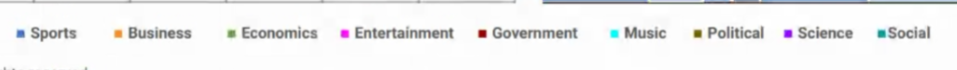

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd

# Разделение данных на обучающую и тестовую выборки
X_train, X_test = train_test_split(embeds, test_size=0.2, random_state=42)

# Применение кластеризации на обучающей выборке
kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto").fit(X_train)

# Предсказание кластеров на всех данных
labels = kmeans.predict(embeds)

# Добавление предсказанных меток кластеров в DataFrame
df['Cluster'] = labels

## Clusters Name

In [76]:
df

,trend_name,tweet_text,Cluster
57083,#엔하이픈_제이,RT @jazmineleonzon1: He looks good in any colo...,4
49235,#몬스타엑스,RT @softforyooki: he also sent a heart to jooh...,7
38038,#김현중_PrismTime_OrangeHug,RT @501yojachingu: OMG HE TOOK OFF HIS FIRST L...,4
38058,#김현중_PrismTime_OrangeHug,RT @SS501xTS_Trends: The end of #김현중_PrismTime...,7
38057,#김현중_PrismTime_OrangeHug,RT @SS501xTS_Trends: The end of #김현중_PrismTime...,7
...,...,...,...
35105,#10YearsOfTeenWolf,RT @xcrolqv: and that's how it all started#10Y...,8
35032,#10YearsOfTeenWolf,RT @xcrolqv: and that's how it all started#10Y...,8
27530,#10YearsOfTeenWolf,RT @haIedrew: thank you for the happiest momen...,8
22459,#10YearsOfTeenWolf,RT @xcrolqv: and that's how it all started#10Y...,8


In [32]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


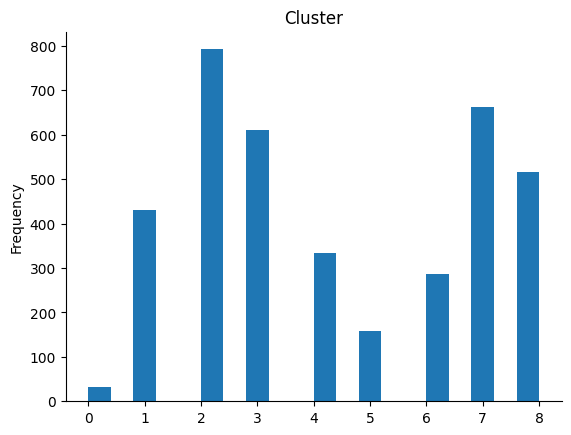

In [77]:
from matplotlib import pyplot as plt
df['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [79]:
# Сортировка уникальных значений кластеров
unique_clusters = sorted(df['Cluster'].unique())

# Группировка данных по кластеру (в данном случае по дате)
grouped = df.groupby('Cluster')['trend_name'].value_counts()

# Вывод 15 самых часто встречающихся представителей по каждому кластеру в отсортированном порядке
for cluster in unique_clusters:
    print(f"For cluster {cluster}:")
    if cluster in grouped.index:
        print(grouped[cluster].nlargest(15))
    else:
        print("No data")
    print()


For cluster 0:
trend_name
#ARSMCI                 5
#MCIARS                 5
#matildas               5
#ARSD                   3
#GoAvsGo                3
#MAFS                   2
#MCICFC                 2
#WALSUI                 2
#BMGFCB                 1
#PremierLeagueNaESPN    1
#VillarrealManUtd       1
#mercantourclassic      1
#satchat                1
Name: count, dtype: int64

For cluster 1:
trend_name
#BETAwards                5
#BTSMeal                  5
#BUTTERARMYPARTY          5
#BUTTERTHEEREMIX          5
#BVBTSG                   5
#BanTwitterInIndia        5
#BartyParty               5
#BigMad                   5
#Bitcoin                  5
#BlueJays                 5
#BuhariMustGo             5
#Butter10thWin            5
#ButterListeningParty7    5
#CANWNT                   5
#ChampionsLeagueFinal     5
Name: count, dtype: int64

For cluster 2:
trend_name
#1YearWithDynamite     5
#81921CB23227          5
#911Anniversary        5
#911Memorial           5
#911onFOX 

Conclusion:
0. Business
1. Social events*
2. Basketball players
3. Music
4. Political
5. Global News
6. Football, Basketball, other Teams
7. Motivational Day journaling
8. American football Teams

In [35]:
import pickle

# Сохранение списка embeds в файл
with open('df_before_naming.pkl', 'wb') as f:
    pickle.dump(df, f)

In [36]:
# Загрузка списка embeds из файла
with open('df_before_naming.pkl', 'rb') as f:
    df_before_naming = pickle.load(f)

df_before_naming

,Time,Source,Topic,Cluster
0,2024-03-03,Twitter,Rashford,2
1,2024-03-03,Twitter,#sundayvibes,7
2,2024-03-03,Twitter,Xavier Worthy,5
3,2024-03-03,Twitter,Foden,2
4,2024-03-03,Twitter,#UFCVegas87,1
...,...,...,...,...
76135,2017-03-18,Google,Robert Osborne,5
76136,2017-03-18,Google,Alejandra Campoverdi,2
76137,2017-03-18,Google,Drake More Life,0
76138,2017-03-18,Google,Drake More Life Download,0


In [37]:
# cluster_names = {
#     0: "Business",
#     1: "Social events",
#     2: "Basketball players",
#     3: "Music",
#     4: "Political",
#     5: "Global News",
#     6: "Football, Basketball, other Teams",
#     7: "Motivational Day journaling",
#     8: "American football Teams"
# }
# df["Cluster"] = df["Cluster"].map(cluster_names)

In [47]:
# redo
# df["Cluster"] = df["Cluster"].map({v: k for k, v in cluster_names.items()})

In [39]:
cluster_names = {
    0: "Business",
    1: "Social events",
    2: "Basketball players",
    3: "Music",
    4: "Political",
    5: "Global News",
    6: "Football, Basketball, other Teams",
    7: "Motivational Day journaling",
    8: "American football Teams"
}
# df["Cluster name"] = df["Cluster"].map(cluster_names)

In [40]:
# del df["Cluster name"]

In [48]:
df

,Time,Source,Topic,Cluster
0,2024-03-03,Twitter,Rashford,2
1,2024-03-03,Twitter,#sundayvibes,7
2,2024-03-03,Twitter,Xavier Worthy,5
3,2024-03-03,Twitter,Foden,2
4,2024-03-03,Twitter,#UFCVegas87,1
...,...,...,...,...
76135,2017-03-18,Google,Robert Osborne,5
76136,2017-03-18,Google,Alejandra Campoverdi,2
76137,2017-03-18,Google,Drake More Life,0
76138,2017-03-18,Google,Drake More Life Download,0


## Forecast

#### All charts together

In [44]:
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [46]:
df

,Time,Source,Topic,Cluster
0,2024-03-03,Twitter,Rashford,Basketball players
1,2024-03-03,Twitter,#sundayvibes,Motivational Day journaling
2,2024-03-03,Twitter,Xavier Worthy,Global News
3,2024-03-03,Twitter,Foden,Basketball players
4,2024-03-03,Twitter,#UFCVegas87,Social events
...,...,...,...,...
76135,2017-03-18,Google,Robert Osborne,Global News
76136,2017-03-18,Google,Alejandra Campoverdi,Basketball players
76137,2017-03-18,Google,Drake More Life,Business
76138,2017-03-18,Google,Drake More Life Download,Business


In [51]:
df

,Time,Source,Topic,Cluster
0,2024-03-03,Twitter,Rashford,2
1,2024-03-03,Twitter,#sundayvibes,7
2,2024-03-03,Twitter,Xavier Worthy,5
3,2024-03-03,Twitter,Foden,2
4,2024-03-03,Twitter,#UFCVegas87,1
...,...,...,...,...
76135,2017-03-18,Google,Robert Osborne,5
76136,2017-03-18,Google,Alejandra Campoverdi,2
76137,2017-03-18,Google,Drake More Life,0
76138,2017-03-18,Google,Drake More Life Download,0


In [55]:
df_sorted

,Source,Topic,Cluster
Time,,,
2017-03-18,Twitter,Northern Kentucky,8
2017-03-18,Twitter,#IFindItSexyWhen,1
2017-03-18,Twitter,#NewJobsForKellyanneConway,1
2017-03-18,Twitter,Greg Monroe,5
2017-03-18,Twitter,Fareed Zakaria,2
...,...,...,...
2024-03-03,Google,Fastest 40-yard dash,5
2024-03-03,Google,Lakers,4
2024-03-03,Twitter,Blank Face,2


[['Twitter' 'Northern Kentucky' 8]
 ['TwitterGoogleGoogleTwitterGoogleGoogleTwitterGoogleGoogleGoogleTwitterGoogleTwitterGoogleTwitterTwitterGoogleGoogleGoogleTwitterTwitterTwitterGoogleTwitterGoogleGoogleGoogleGoogleTwitterTwitter'
  "David RockefellerDavid RockefellerDavid RockefellerSusan RiceEmpirePaul ManafortGeorgetownPaul ManafortEmpireDevin NunesBoris EpshteynLas VegasJared KushnerJared KushnerRemove Rep. Devin NunesBill O'ReillyJared KushnerDevin NunesCollege BoardThe Crisis of TrumpismMike PenceMike FlynnIvanka TrumpTrump UniversityIvanka TrumpMichael FlynnGonzaga Universitythe SenateOur Dishonest PresidentJudge to Trump"
  240]
 ['TwitterTwitterGoogleGoogleGoogleGoogleGoogleGoogleGoogleGoogleTwitterTwitterTwitterGoogleGoogleGoogleGoogleGoogleTwitterGoogleGoogleGoogleGoogleGoogleGoogleTwitterTwitterTwitterGoogleGoogleTwitterTwitterTwitterTwitterGoogleGoogleTwitterTwitterTwitterTwitterGoogle'
  'Senate Judiciary CommitteeSt. PetersburgBill OreillySt PetersburgSusan RiceFazlur 

TypeError: unhashable type: 'numpy.ndarray'

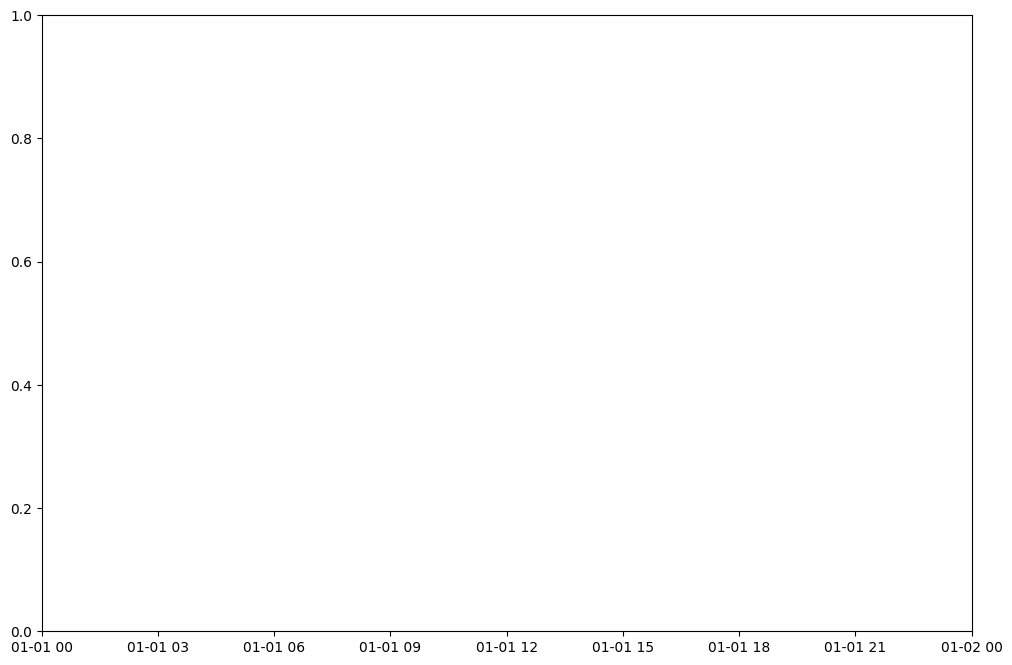

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

# Отсортировать данные по времени
df_sorted = df.sort_values(by='Time')

# Преобразовать столбец 'Time' в формат datetime и установить его в качестве индекса
df_sorted['Time'] = pd.to_datetime(df_sorted['Time'])
df_sorted.set_index('Time', inplace=True)

# Создание графика жизненного цикла каждого кластера по неделям
plt.figure(figsize=(12, 8))

# Список цветов для каждого кластера
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

cluster_names = {
    0: "Business",
    1: "Social events",
    2: "Basketball players",
    3: "Music",
    4: "Political",
    5: "Global News",
    6: "Football, Basketball, other Teams",
    7: "Motivational Day journaling",
    8: "American football Teams"
}

# Перебор всех кластеров
for i, cluster in enumerate(df_sorted['Cluster'].unique()):
    # Фильтрация данных для текущего кластера
    cluster_data = df_sorted[df_sorted['Cluster'] == cluster]
    # Ресемплирование данных по двум неделям и вычисление суммарного количества постов для каждой недели
    cluster_data_weekly = cluster_data.resample('2W').sum()

    cluster_name = cluster_names.get(cluster, f"Cluster {cluster}")
    print(cluster_data_weekly.values)
    # Построение графика для текущего кластера
    plt.plot(cluster_data_weekly.index, cluster_data_weekly.values,
             label=f'Кластер {cluster_name}', color=colors[i])

    # Обучение модели Prophet на данных текущего кластера
    model = Prophet()
    cluster_data_prophet = cluster_data_weekly.reset_index().rename(columns={'Time': 'ds', 'Cluster': 'y'})
    model.fit(cluster_data_prophet)

    # Создание DataFrame для прогноза на 30 дней вперед
    future = model.make_future_dataframe(periods=30, freq='2W', include_history=False)

    # Получение прогноза для текущего кластера
    forecast = model.predict(future)

    # Построение прогноза для текущего кластера
    plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color=colors[i], label=f'Прогноз кластера {cluster_name}')

# Добавление заголовка и меток осей
plt.title('Жизненный цикл каждого кластера и прогноз от Prophet')
plt.xlabel('Неделя')
plt.ylabel('Суммарное количество постов')
plt.legend()  # Добавление легенды

# Поворот дат на оси x для лучшей читаемости
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### All charts separately

TypeError: unhashable type: 'numpy.ndarray'

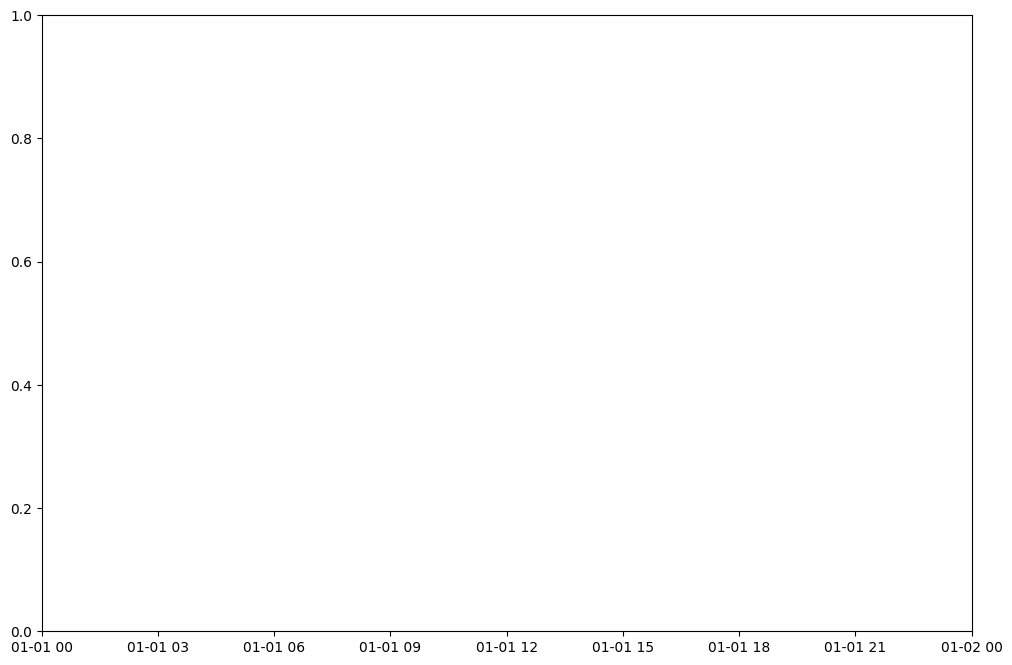

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

# Отсортировать данные по времени
df_sorted = df.sort_values(by='Time')

# Преобразовать столбец 'Time' в формат datetime и установить его в качестве индекса
df_sorted['Time'] = pd.to_datetime(df_sorted['Time'])
df_sorted.set_index('Time', inplace=True)

# Список цветов для каждого кластера
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

# Словарь для маппинга числовых значений кластеров на их названия
cluster_names = {
    0: "Business",
    1: "Social events",
    2: "Basketball players",
    3: "Music",
    4: "Political",
    5: "Global News",
    6: "Football, Basketball, other Teams",
    7: "Motivational Day journaling",
    8: "American football Teams"
}

# Перебор всех кластеров
for i, cluster in enumerate(df_sorted['Cluster'].unique()):
    cluster_name = cluster_names.get(cluster, f"Кластер {cluster}")  # Получение названия кластера из словаря
    # Фильтрация данных для текущего кластера
    cluster_data = df_sorted[df_sorted['Cluster'] == cluster]
    # Ресемплирование данных по двум неделям и вычисление суммарного количества постов для каждой недели
    cluster_data_weekly = cluster_data.resample('2W').sum()

    # Создание графика для текущего кластера
    plt.figure(figsize=(12, 8))
    plt.plot(cluster_data_weekly.index, cluster_data_weekly.values, label=f'{cluster_name}', color=colors[i])

    # Обучение модели Prophet на данных текущего кластера
    model = Prophet()
    cluster_data_prophet = cluster_data_weekly.reset_index().rename(columns={'Time': 'ds', 'Cluster': 'y'})
    model.fit(cluster_data_prophet)

    # Создание DataFrame для прогноза на 30 дней вперед
    future = model.make_future_dataframe(periods=30, freq='2W', include_history=False)

    # Получение прогноза для текущего кластера
    forecast = model.predict(future)

    # Построение прогноза для текущего кластера
    plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color=colors[i], label=f'Прогноз кластера {cluster_name}')

    # Добавление заголовка и меток осей
    plt.title(f'Жизненный цикл кластера {cluster_name} и прогноз от Prophet')
    plt.xlabel('Неделя')
    plt.ylabel('Суммарное количество постов')
    plt.legend()  # Добавление легенды

    # Поворот дат на оси x для лучшей читаемости
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


#### All charts separately with components

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/4rjh5me7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/1syagz0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62145', 'data', 'file=/tmp/tmpe5lweo6f/4rjh5me7.json', 'init=/tmp/tmpe5lweo6f/1syagz0r.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_modelzh

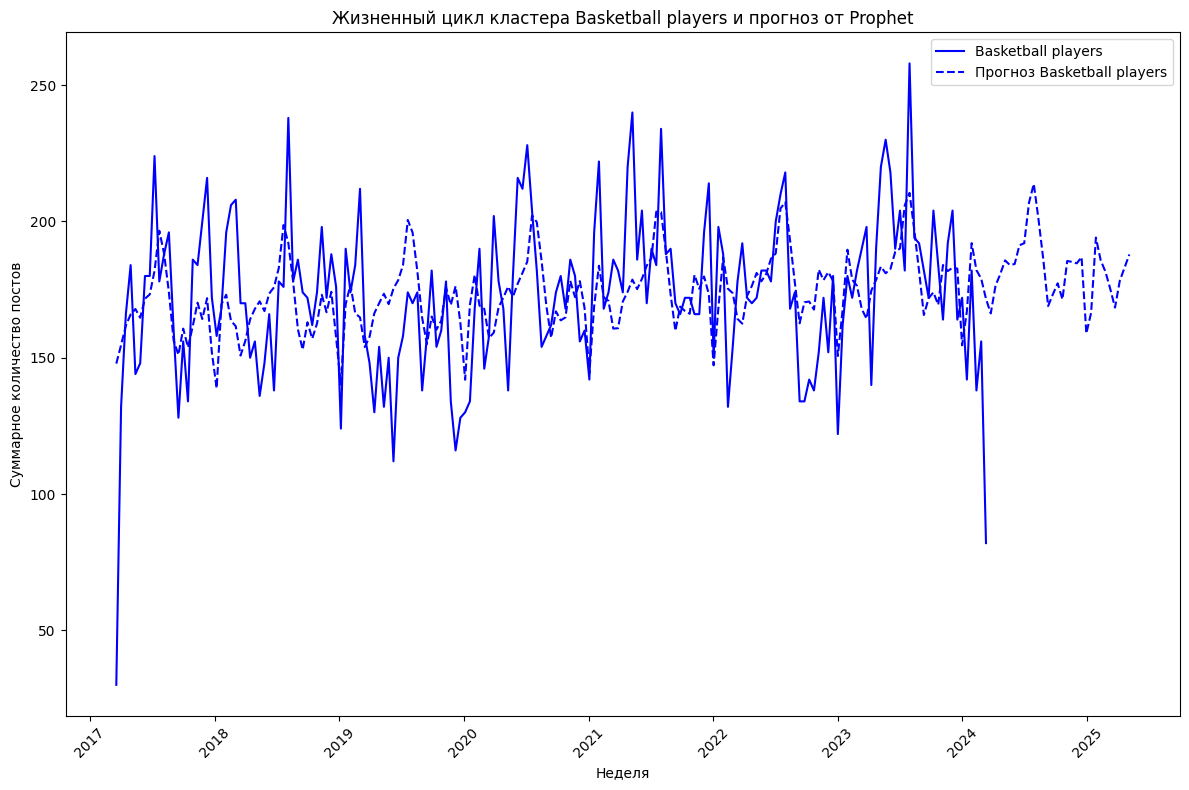

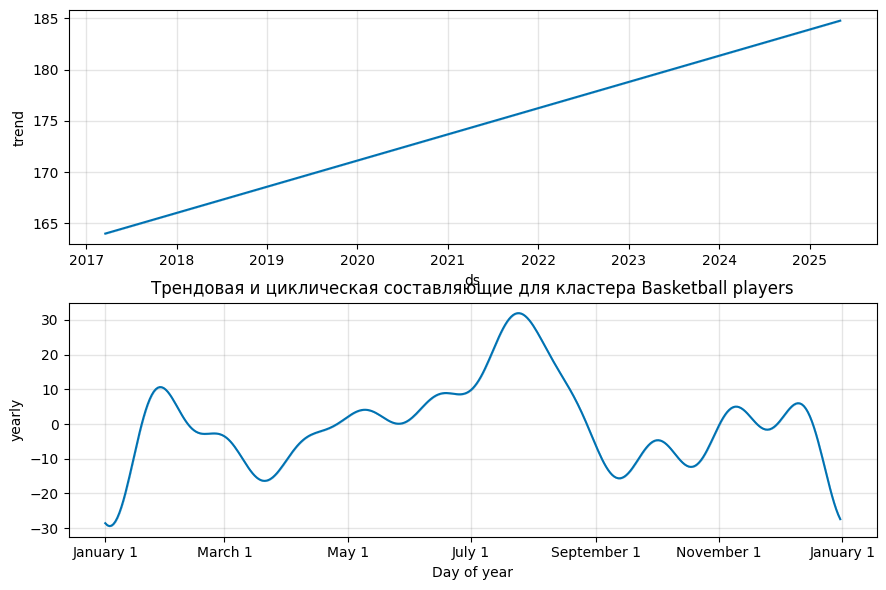

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/uw_omeqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/__3hx1kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5648', 'data', 'file=/tmp/tmpe5lweo6f/uw_omeqv.json', 'init=/tmp/tmpe5lweo6f/__3hx1kt.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_modelufw

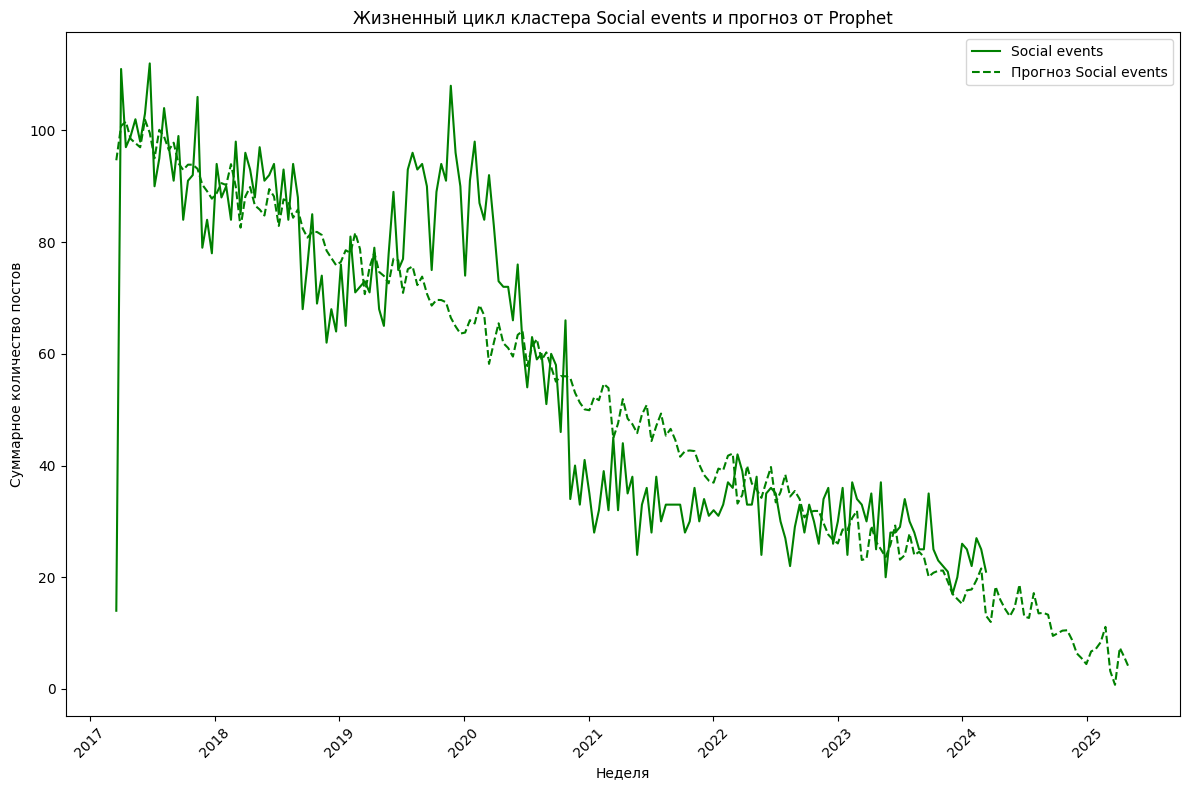

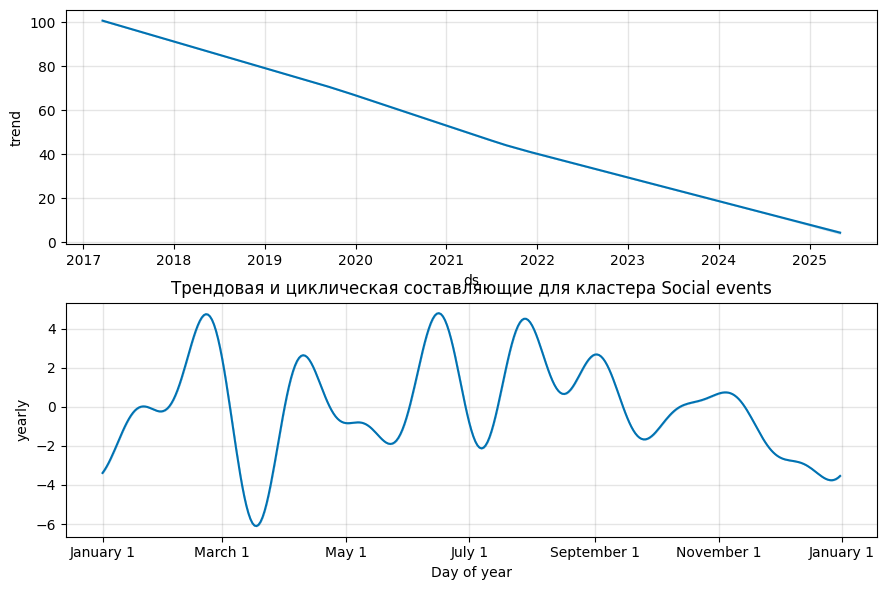

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/1k52a8vc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/l32pt6_9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37600', 'data', 'file=/tmp/tmpe5lweo6f/1k52a8vc.json', 'init=/tmp/tmpe5lweo6f/l32pt6_9.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_modelne

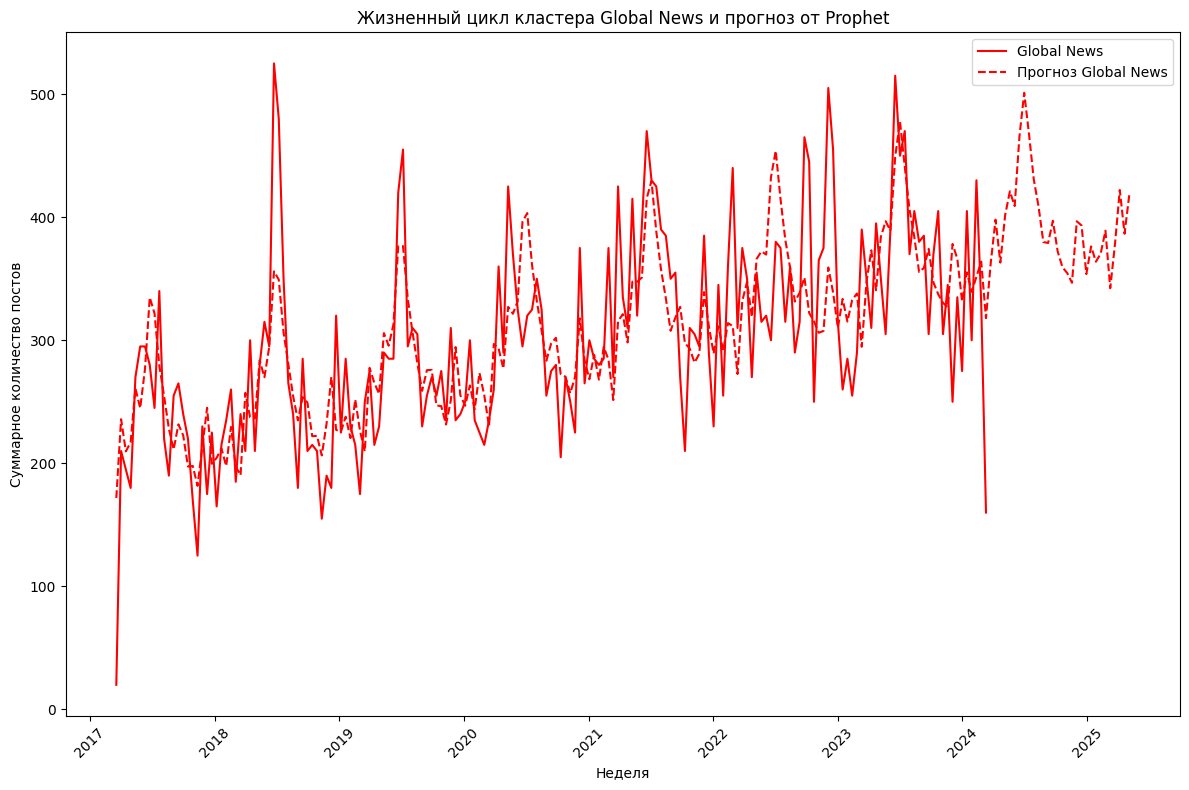

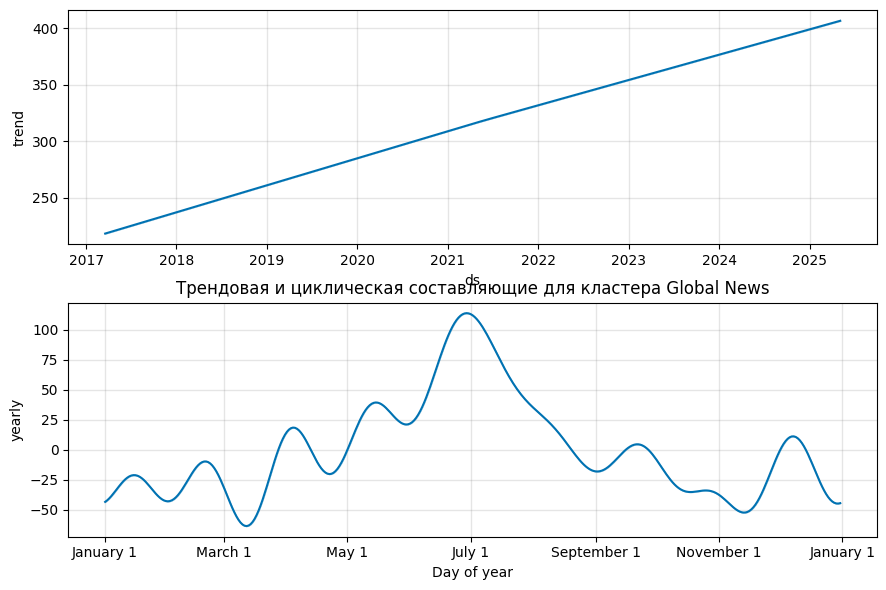

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


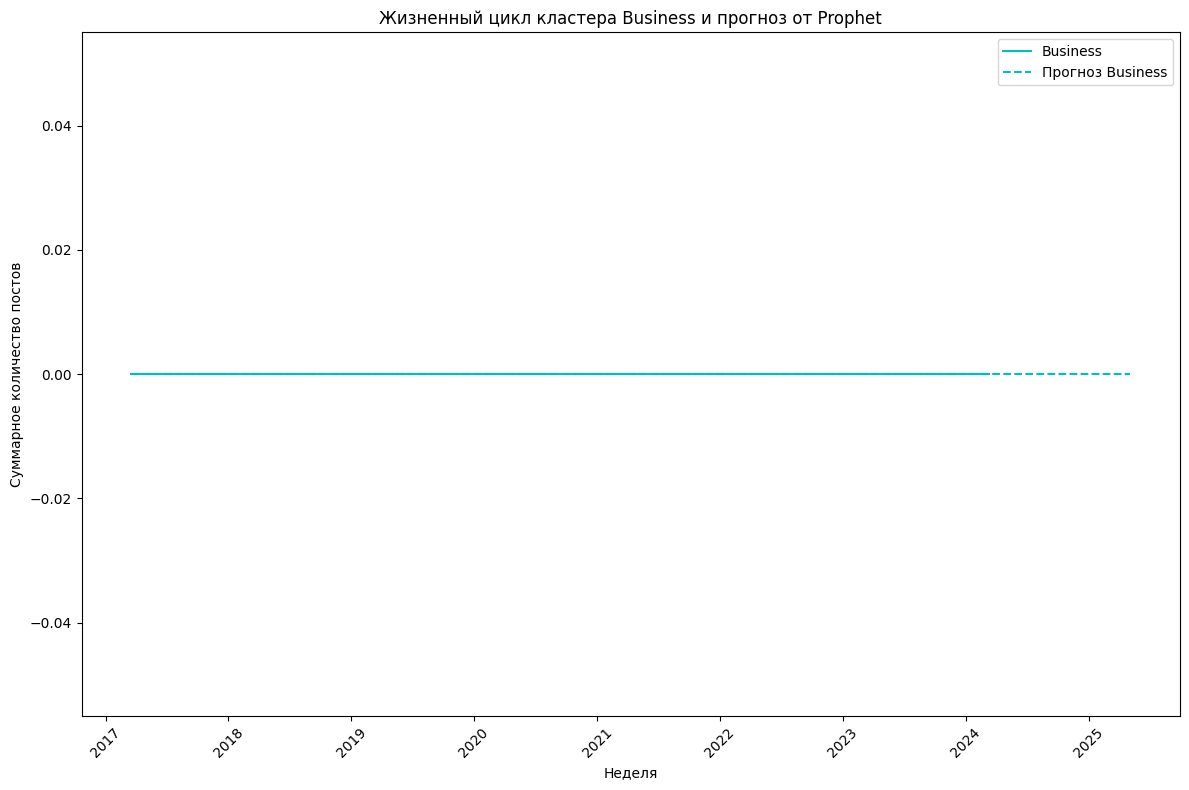

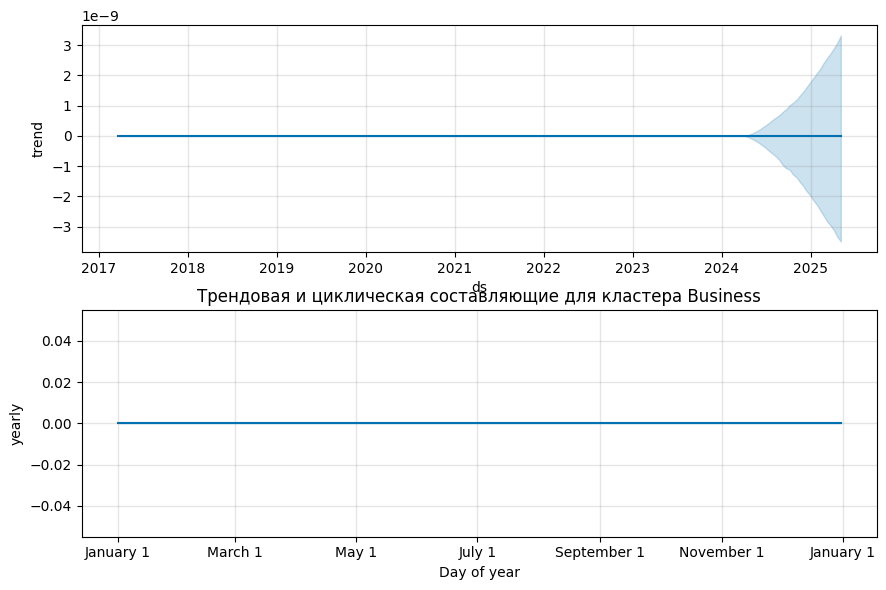

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/i7_vw5zg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/_uba026a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17641', 'data', 'file=/tmp/tmpe5lweo6f/i7_vw5zg.json', 'init=/tmp/tmpe5lweo6f/_uba026a.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_modelw1

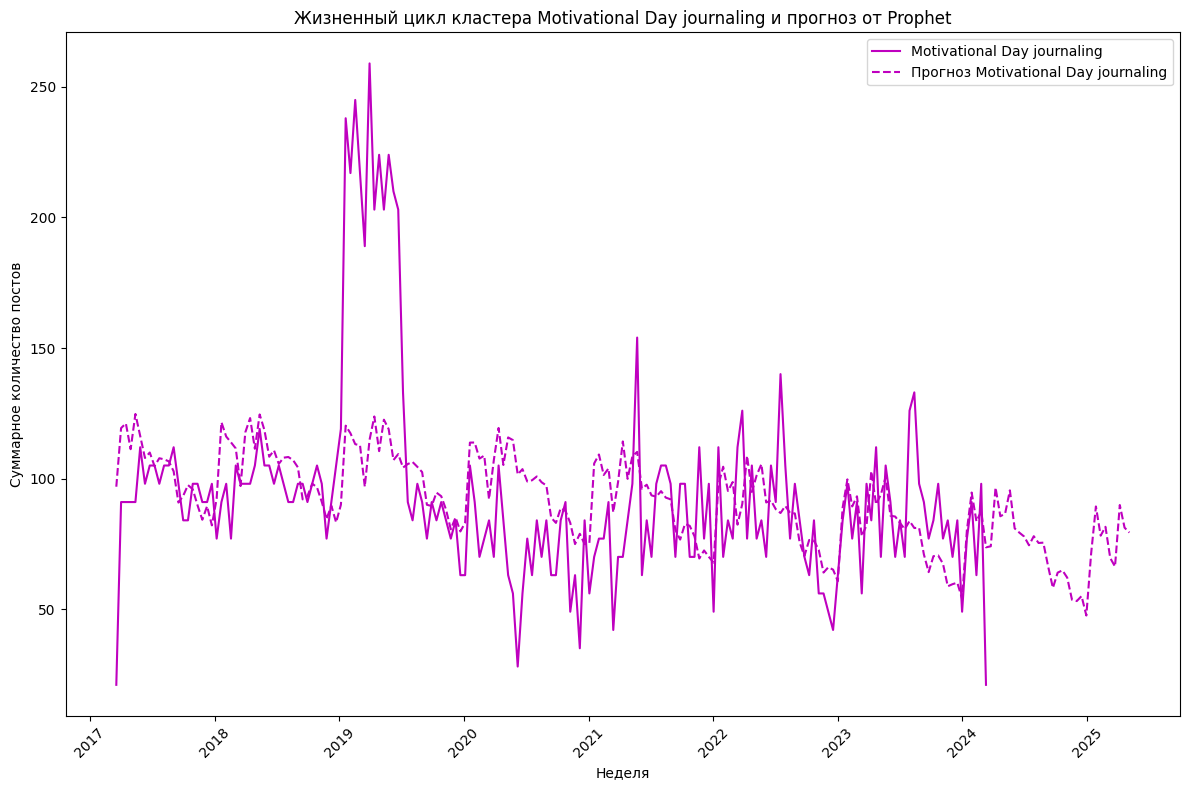

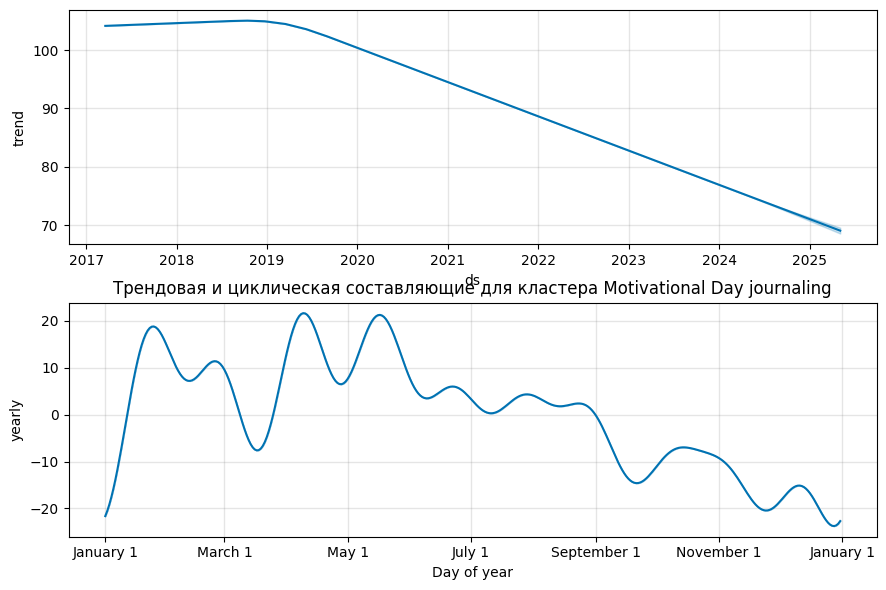

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/qwq074ci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/p6hd49ez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35149', 'data', 'file=/tmp/tmpe5lweo6f/qwq074ci.json', 'init=/tmp/tmpe5lweo6f/p6hd49ez.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_model9b

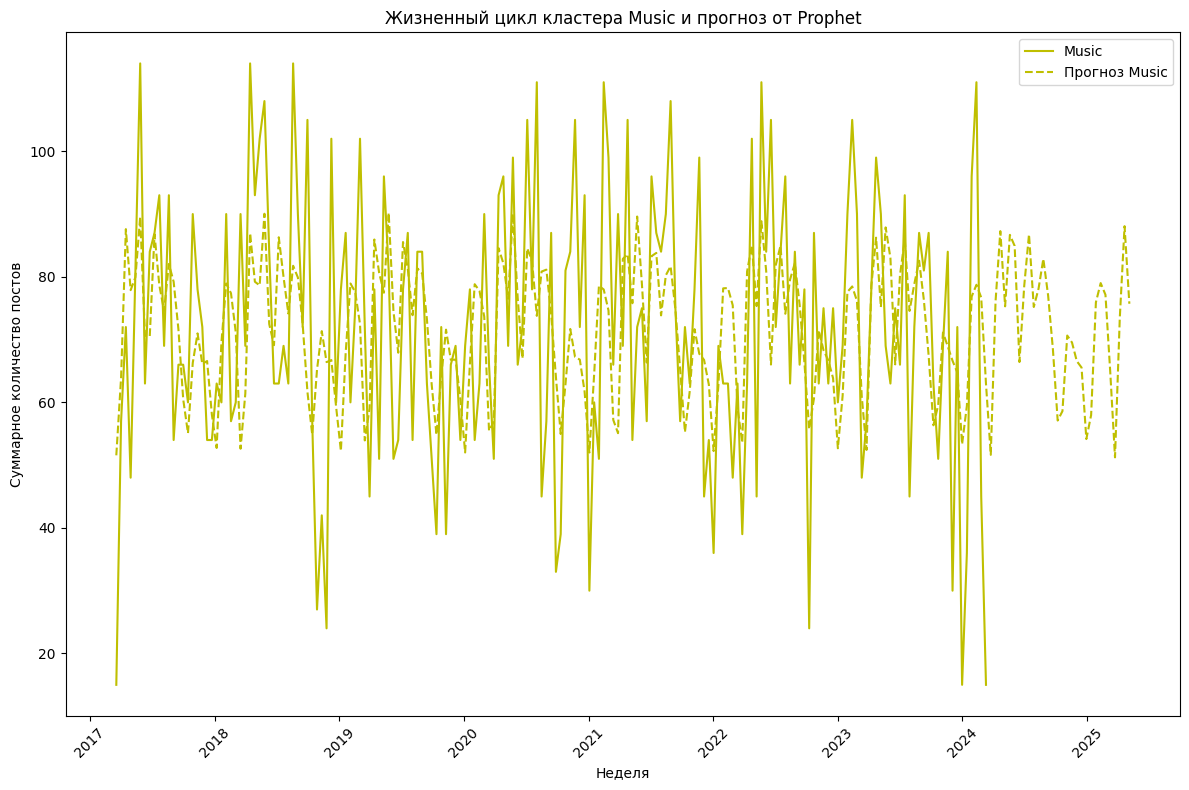

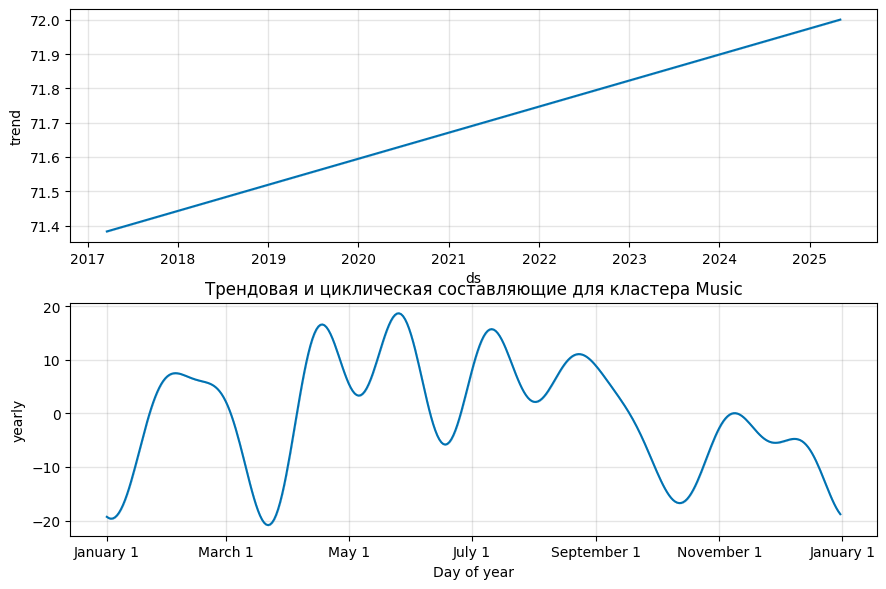

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/h84yizeh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/qx_ac5mk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33373', 'data', 'file=/tmp/tmpe5lweo6f/h84yizeh.json', 'init=/tmp/tmpe5lweo6f/qx_ac5mk.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_model73

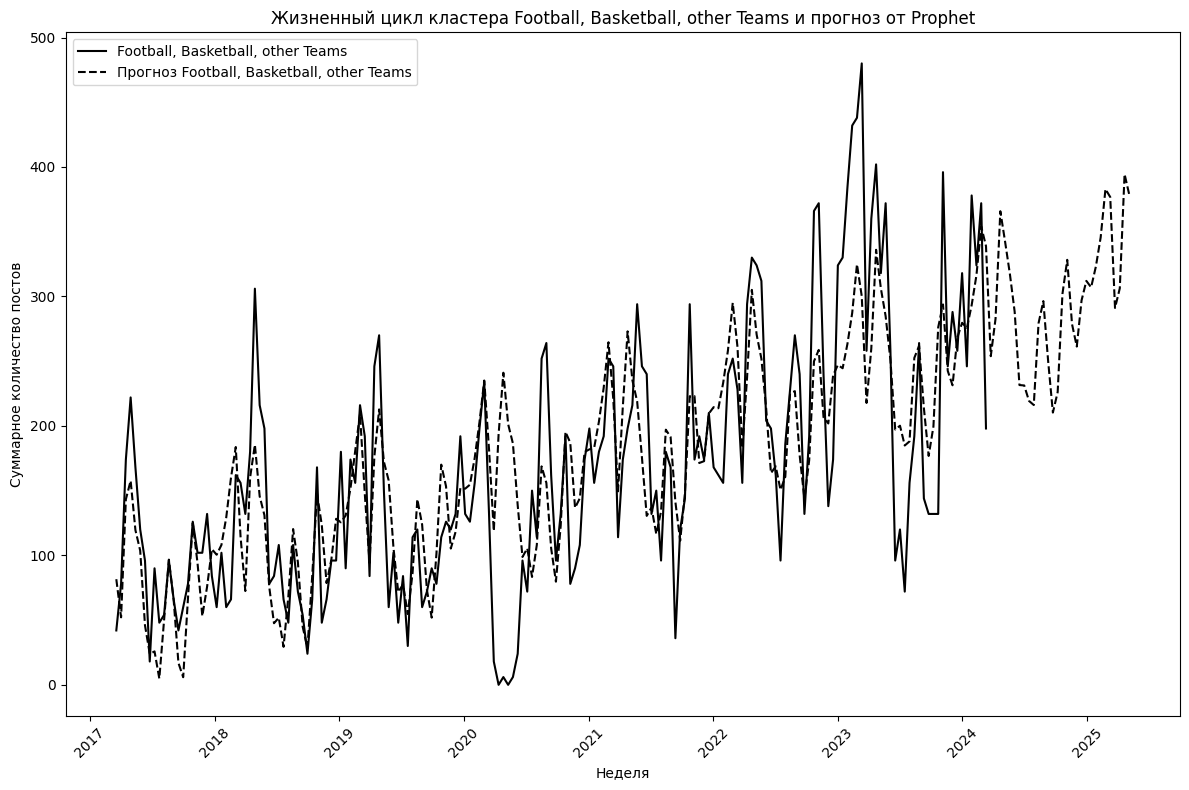

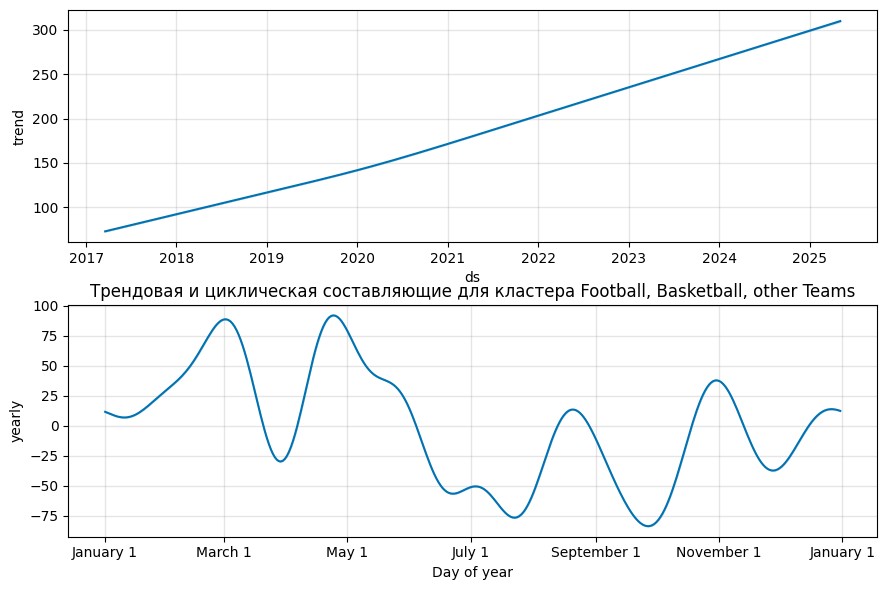

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/brdqts0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/_9fc464i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18569', 'data', 'file=/tmp/tmpe5lweo6f/brdqts0c.json', 'init=/tmp/tmpe5lweo6f/_9fc464i.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_modelzb

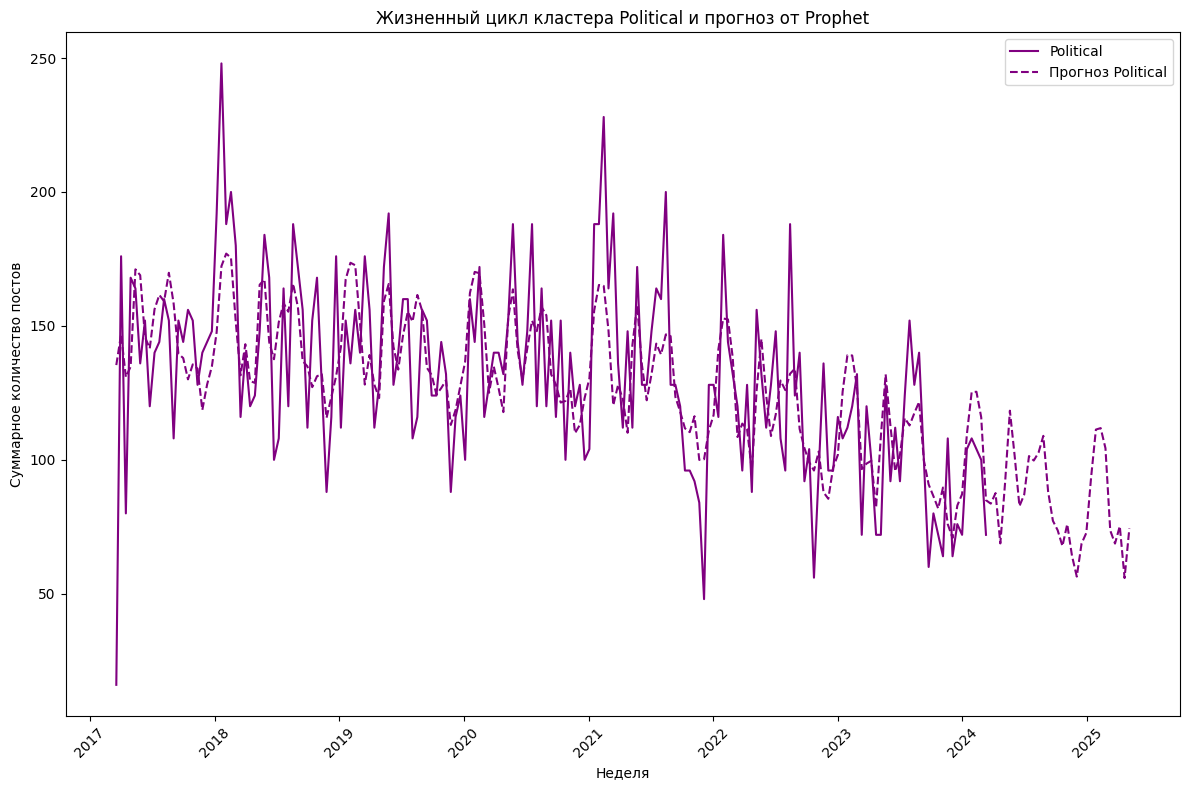

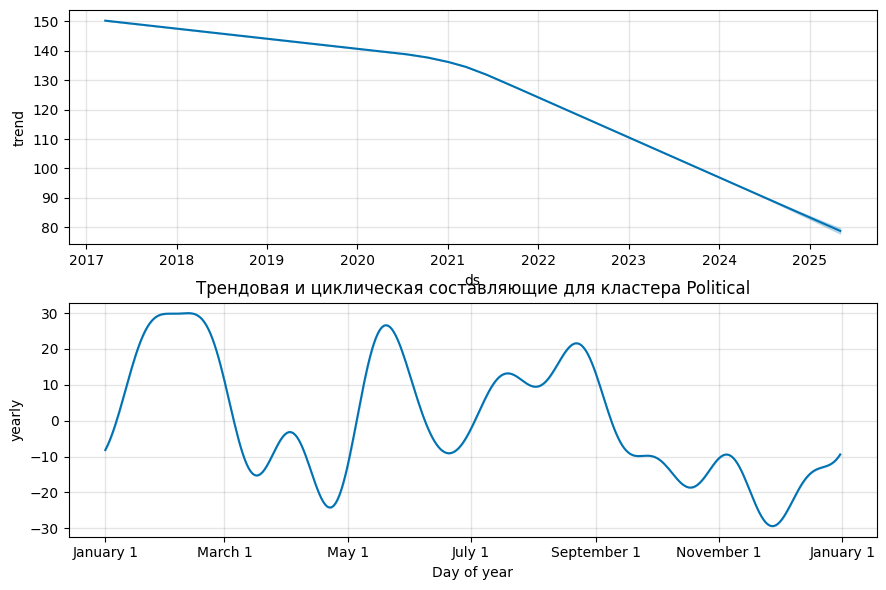

<ipython-input-43-4ecbfdf7b289>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_data_weekly = cluster_data.resample('2W').sum()
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/o4r9qkg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5lweo6f/cc1wxkfo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55555', 'data', 'file=/tmp/tmpe5lweo6f/o4r9qkg1.json', 'init=/tmp/tmpe5lweo6f/cc1wxkfo.json', 'output', 'file=/tmp/tmpe5lweo6f/prophet_modelew

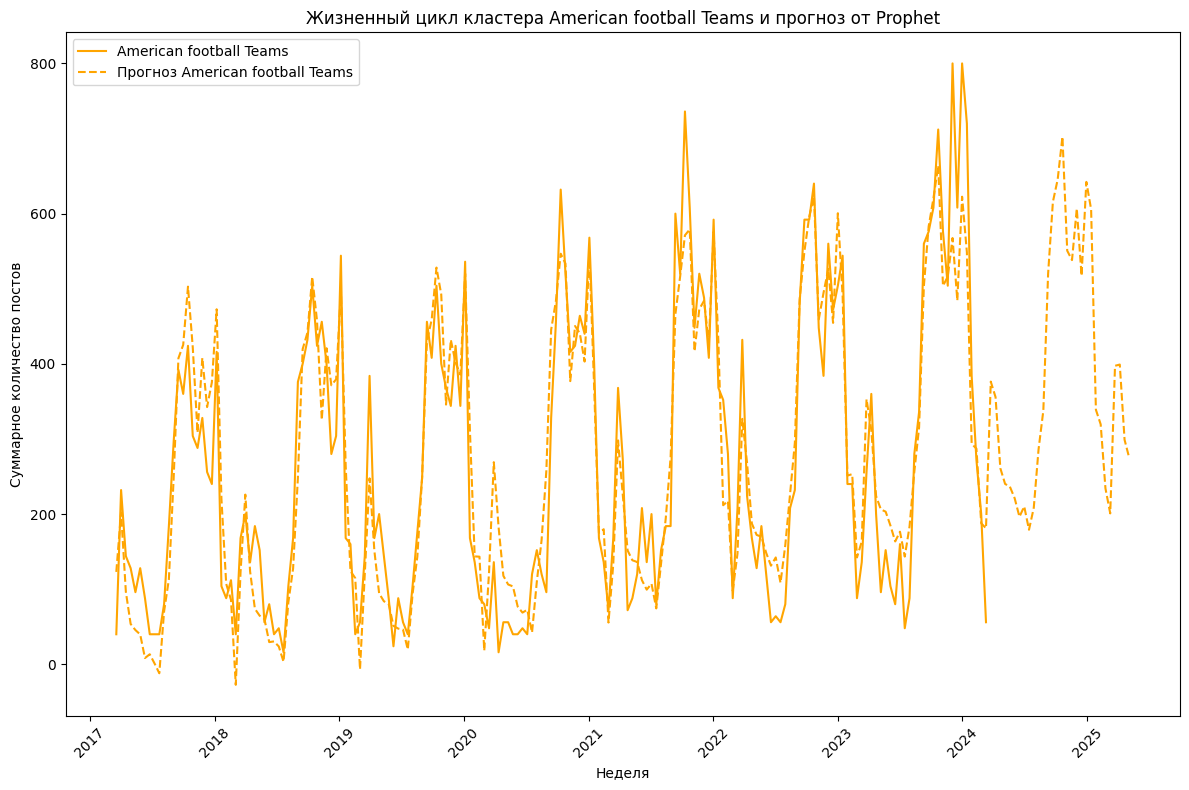

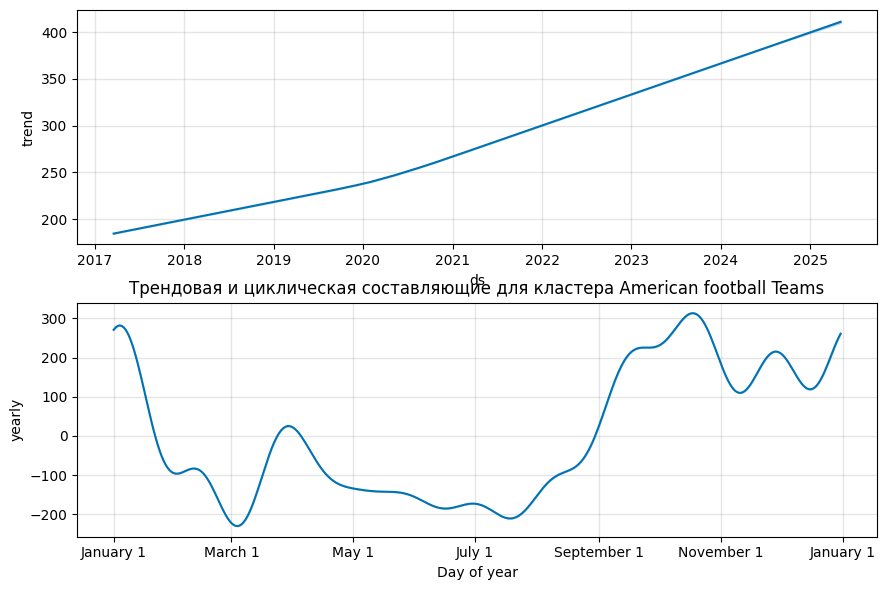

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

# Отсортировать данные по времени
df_sorted = df.sort_values(by='Time')

# Преобразовать столбец 'Time' в формат datetime и установить его в качестве индекса
df_sorted['Time'] = pd.to_datetime(df_sorted['Time'])
df_sorted.set_index('Time', inplace=True)

# Список цветов для каждого кластера
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

# Словарь для маппинга числовых значений кластеров на их названия
cluster_names = {
    0: "Business",
    1: "Social events",
    2: "Basketball players",
    3: "Music",
    4: "Political",
    5: "Global News",
    6: "Football, Basketball, other Teams",
    7: "Motivational Day journaling",
    8: "American football Teams"
}

# Перебор всех кластеров
for i, cluster in enumerate(df_sorted['Cluster'].unique()):
    cluster_name = cluster_names.get(cluster, f"Кластер {cluster}")  # Получение названия кластера из словаря
    # Фильтрация данных для текущего кластера
    cluster_data = df_sorted[df_sorted['Cluster'] == cluster]
    # Ресемплирование данных по двум неделям и вычисление суммарного количества постов для каждой недели
    cluster_data_weekly = cluster_data.resample('2W').sum()

    # Создание графика для текущего кластера
    plt.figure(figsize=(12, 8))
    plt.plot(cluster_data_weekly.index, cluster_data_weekly.values, label=f'{cluster_name}', color=colors[i])

    # Обучение модели Prophet на данных текущего кластера
    model = Prophet()
    cluster_data_prophet = cluster_data_weekly.reset_index().rename(columns={'Time': 'ds', 'Cluster': 'y'})
    model.fit(cluster_data_prophet)

    # Создание DataFrame для прогноза на 30 дней вперед
    future = model.make_future_dataframe(periods=30, freq='2W', include_history=True)

    # Получение прогноза для текущего кластера
    forecast = model.predict(future)

    # Построение прогноза для текущего кластера
    plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color=colors[i], label=f'Прогноз {cluster_name}')

    # Добавление заголовка и меток осей
    plt.title(f'Жизненный цикл кластера {cluster_name} и прогноз от Prophet')
    plt.xlabel('Неделя')
    plt.ylabel('Суммарное количество постов')
    plt.legend()  # Добавление легенды

    # Поворот дат на оси x для лучшей читаемости
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Вывод трендовой и циклической составляющих для текущего кластера
    fig = model.plot_components(forecast)
    plt.title(f'Трендовая и циклическая составляющие для кластера {cluster_name}')
    plt.show()


In [ ]:
df_cluster_8 = df.loc[df['Cluster'] == 8]
df_cluster_8
# American football